*   Name: Prabhashan Madurawala
*   UOW: W2053510

*   IIT: 20232414
*   Reviewer:

# **Final Python Notebook 3: Regression DT and Ensemble Learners**

**Code Reuse Session 3 (Week 11): Questions 1, 6, 8, 9, 10, 12, 13, 14**

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## **Ensemble Models (Part 1)**

**Code Reuse Session 3 (Week 11): Question 2 and Question 3**

In [2]:
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/ML/CW/Classification_prepared_dataset.csv')

# Displaying the first 5 rows
data.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68,2,0,0,0,0,3,1,4,1,1,24,1,60,1
1,50,2,1,1,1,1,2,1,35,1,1,14,5,62,1
2,58,2,2,2,2,1,2,1,63,1,1,14,7,75,1
3,58,2,0,0,0,0,3,1,18,1,1,2,1,84,1
4,47,2,1,0,3,0,3,1,41,1,1,3,1,50,1


**Code Reuse Session 3 (Week 11): Question 4**

In [3]:
# Displays all the column names and the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4012 non-null   int64
 1   Sex                     4012 non-null   int64
 2   T_Stage                 4012 non-null   int64
 3   N_Stage                 4012 non-null   int64
 4   6th_Stage               4012 non-null   int64
 5   Differentiated          4012 non-null   int64
 6   Grade                   4012 non-null   int64
 7   A_Stage                 4012 non-null   int64
 8   Tumor_Size              4012 non-null   int64
 9   Estrogen_Status         4012 non-null   int64
 10  Progesterone_Status     4012 non-null   int64
 11  Regional_Node_Examined  4012 non-null   int64
 12  Reginol_Node_Positive   4012 non-null   int64
 13  Survival_Months         4012 non-null   int64
 14  Mortality_Status        4012 non-null   int64
dtypes: int64(15)
memory u

**Code Reuse Session 3 (Week 11): Question 5**

In [4]:
# Spliting the dataset into features and target variables
feature_cols = ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months']
# Feature columns(Variables)
X = data[feature_cols]
# Target column(Variable)
y = data['Mortality_Status']

**Code Reuse Session 3 (Week 11): Question 7**

In [5]:
# Spliting the dataset into training and testing subsets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

**Code Reuse Session 3 (Week 11): Question 9**

In [6]:
base_learners=[('KNN', KNeighborsClassifier(n_neighbors=13, metric='manhattan')),
('LR', LogisticRegression(C=0.1, penalty='l2', solver='liblinear'))]

ensemble_learner = VotingClassifier(base_learners, voting='soft')

**Code Reuse Session 3 (Week 11): Question 12**

In [7]:
# Training voting ensemble model and getting Predictions
ensemble_learner.fit(X_train, y_train)
y_pred_ensemble_learner = ensemble_learner.predict(X_test)

# Checking the accuracy levels of ensemble model predictions
ensemble_learner_accuracy = accuracy_score(y_test, y_pred_ensemble_learner)
print ("The voting ensemble classifier accuracy is: ", ensemble_learner_accuracy)

The voting ensemble classifier accuracy is:  0.9090909090909091


**Code Reuse Session 3 (Week 11): Question 13**

Text(0.5, 1.0, 'Ensemble Learner Confusion Matrix')

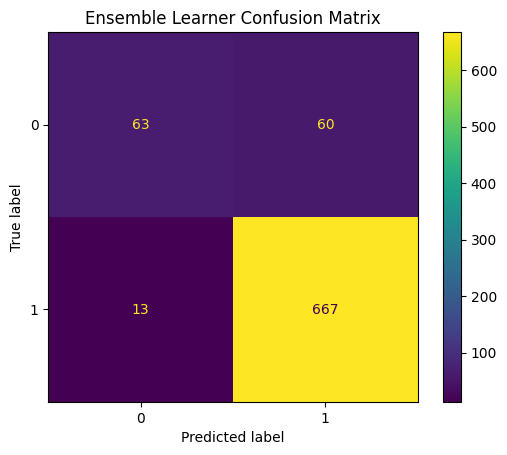

In [8]:
# Visualizing the ensemble model performance ploting confusion matrix
ensemble_cm = confusion_matrix(y_test, y_pred_ensemble_learner, labels=ensemble_learner.classes_)
ensemble_disp = ConfusionMatrixDisplay(ensemble_cm, display_labels=ensemble_learner.classes_)
ensemble_disp.plot()
ensemble_disp.ax_.set_title("Ensemble Learner Confusion Matrix")

**Code Reuse Session 3 (Week 11): Question 14**

In [9]:
# Classification Report of the Ensemble Learner Model
print("Ensemble Learner Classification Report:\n", classification_report(y_test, y_pred_ensemble_learner))

Ensemble Learner Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.51      0.63       123
           1       0.92      0.98      0.95       680

    accuracy                           0.91       803
   macro avg       0.87      0.75      0.79       803
weighted avg       0.90      0.91      0.90       803



**Code Reuse Session 3 (Week 11): Question 15**

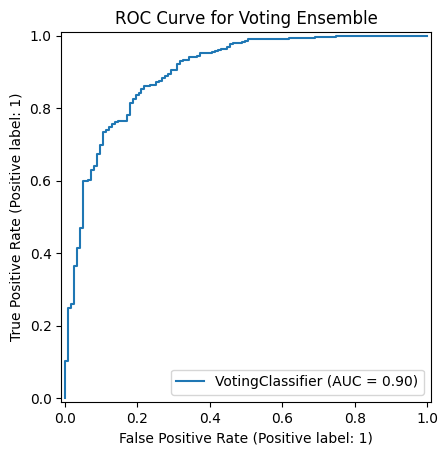

In [10]:
# ROC curve of the Ensemble Learner Model
RocCurveDisplay.from_estimator(ensemble_learner, X_test, y_test)
plt.title("ROC Curve for Voting Ensemble")
plt.show()

## **Regression Decision Trees (Part 2)**

**Code Reuse Session 3 (Week 11): Question 2 and Question 3**

In [11]:
# Loading the Regression prepared dataset
data= pd.read_csv('/content/drive/MyDrive/ML/CW/Regression_prepared_dataset.csv')

# Displays all the column names and the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     615 non-null    int64
 1   Sex                     615 non-null    int64
 2   T_Stage                 615 non-null    int64
 3   N_Stage                 615 non-null    int64
 4   6th_Stage               615 non-null    int64
 5   Differentiated          615 non-null    int64
 6   Grade                   615 non-null    int64
 7   A_Stage                 615 non-null    int64
 8   Tumor_Size              615 non-null    int64
 9   Estrogen_Status         615 non-null    int64
 10  Progesterone_Status     615 non-null    int64
 11  Regional_Node_Examined  615 non-null    int64
 12  Reginol_Node_Positive   615 non-null    int64
 13  Survival_Months         615 non-null    int64
 14  Mortality_Status        615 non-null    int64
dtypes: int64(15)
memory usa

**Code Reuse Session 3 (Week 11): Question 4**

In [12]:
# Spliting the dataset into features and target variables
feature_cols = ['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']
# Feature columns(Variables)
X_reg = data[feature_cols]
# Target column(Variable)
y_reg= data['Survival_Months']

**Code Reuse Session 3 (Week 11): Question 5**

In [13]:
# Spliting the dataset into training and testing subsets for regression model
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

**Code Reuse Session 3 (Week 11): Question 7**

In [14]:
# Creating and training the fully grown Decision Tree (DT)
DT_regressor = DecisionTreeRegressor(random_state=42)
DT_regressor.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(random_state=42)

**Code Reuse Session 3 (Week 11): Question 8**

In [15]:
# Getting Predictions of the regression model
y_pred_reg_full = DT_regressor.predict(X_test_reg)

**Code Reuse Session 3 (Week 11): Question 9**

In [16]:
# Calculating the regression metrics of the fully grown regression DT
print('MAE:', metrics.mean_absolute_error(y_test_reg, y_pred_reg_full))
print('MSE:', metrics.mean_squared_error(y_test_reg, y_pred_reg_full))
print('R2:', metrics.r2_score(y_test_reg, y_pred_reg_full))

MAE: 28.040650406504064
MSE: 1134.0243902439024
R2: -1.1297698580795212


**Code Reuse Session 3 (Week 11): Question 11**

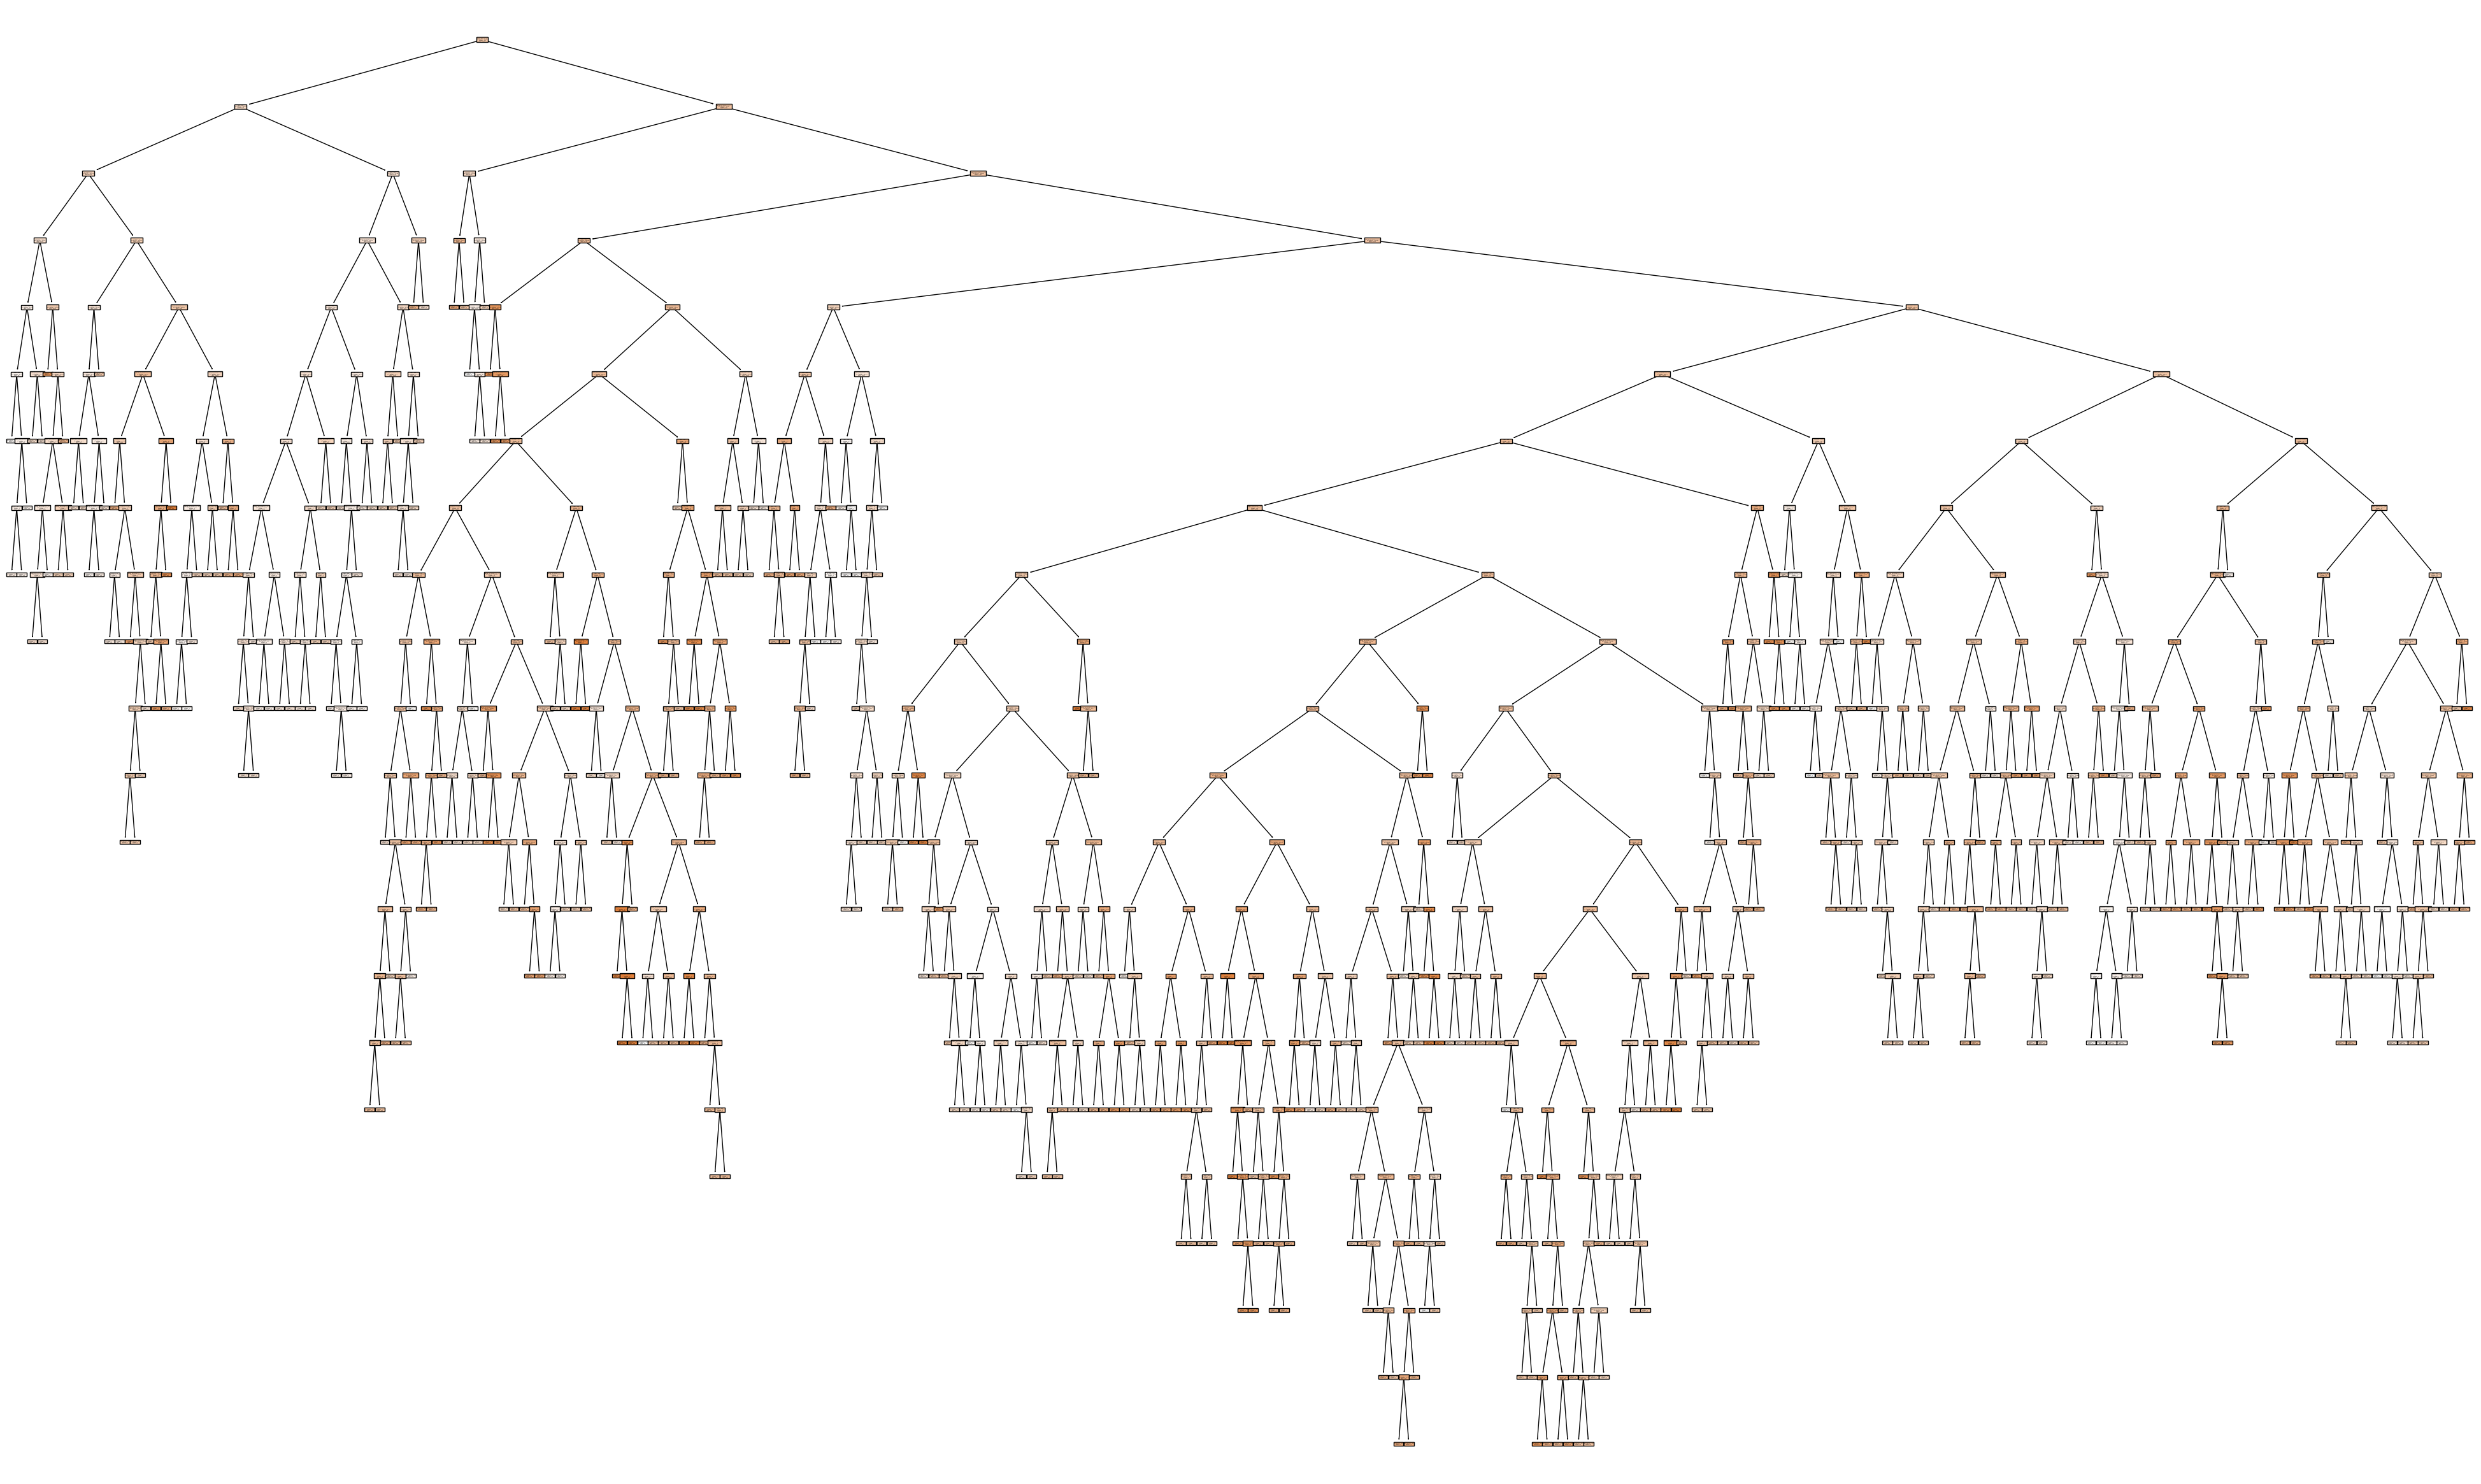

In [17]:
# Ploting regression DT and saving it
Tree_figure = plt.figure(figsize=(50, 30))
tree.plot_tree(DT_regressor, feature_names=list(X_train_reg.columns), filled=True)
Tree_figure.savefig("fully_grown_tree.svg")

**Code Reuse Session 3 (Week 11): Question 12 and Question 13**

In [18]:
# Creating and training the pruned tree for a depth of 4 levels
DT_pruned = DecisionTreeRegressor(max_depth=4, random_state=42)
DT_pruned.fit(X_train_reg, y_train_reg)
y_pred_pruned = DT_pruned.predict(X_test_reg)

# Calculating the regression metrics of the fully grown pruned regression DT
print('Pruned MAE:', metrics.mean_absolute_error(y_test_reg, y_pred_pruned))
print('Pruned MSE:', metrics.mean_squared_error(y_test_reg, y_pred_pruned))
print('Pruned R2:', metrics.r2_score(y_test_reg, y_pred_pruned))

# Plot of Pruned Tree
Pruned_Tree_figure = plt.figure(figsize=(100, 100))
tree.plot_tree(DT_pruned, feature_names=list(X_train_reg.columns), filled=True)
Pruned_Tree_figure.savefig("pruned_tree.svg")

Pruned MAE: 19.990589097481994
Pruned MSE: 601.0184673191019
Pruned R2: -0.12875086890333098
